# Школа глубокого обучения

<a href="https://mipt.ru/science/labs/laboratoriya-neyronnykh-sistem-i-glubokogo-obucheniya/"><img align="right" src="https://avatars1.githubusercontent.com/u/29918795?v=4&s=200" alt="DeepHackLab" style="position:relative;top:-40px;right:10px;height:100px;" /></a>



### Физтех-Школа Прикладной математики и информатики МФТИ 
### Лаборатория нейронных сетей и глубокого обучения (DeepHackLab)


## Введение в нейронные сети

### Некоторые напоминания про язык Python и библиотеки

1. NumPy -- работа с системами линейных уравнений, вычисления с матрицами. 
2. Pandas -- работа с таблицами
3. SciPy -- преимущественно оптимизационные рассчеты
4. tqdm -- чтобы знать, когда досчитается программа
5. Matplotlib -- красивые графики! :)

In [25]:
from pylab import *
import scipy.stats as sps
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.path as mpath 
import matplotlib.patches as mpatches 
import matplotlib.pyplot as plt 
from pandas.plotting import bootstrap_plot

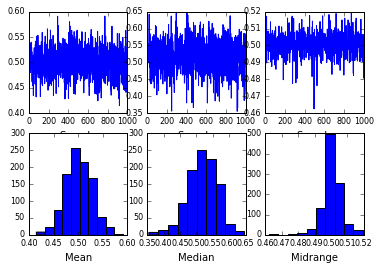

In [26]:
data = pd.Series(np.random.rand(1000))
bootstrap_plot(data, size=100, samples=1000)

### Экспериментальные данные

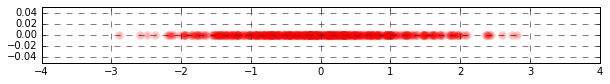

In [29]:
sample = sps.norm.rvs(size=500)

plt.figure(figsize=(10, 1))
plt.grid(ls='--')
plt.scatter(sample, np.zeros(500), alpha=0.2, color = 'r',linewidths=4)  # alpha - прозрачность точки
plt.show()

# Нейрон
Искусственный нейрон — узел ***искусственной нейронной сети***, являющийся упрощённой моделью естественного нейрона. Математически, искусственный нейрон обычно представляют как некоторую ***нелинейную*** функцию от единственного аргумента — линейной комбинации всех входных сигналов. Данную функцию называют ***функцией активации***. Полученный результат посылается на единственный выход. Такие искусственные нейроны объединяют в ***сети*** — соединяют выходы одних нейронов с входами других. Искусственные нейроны и сети являются основными элементами идеального нейрокомпьютера.

### Реализация *перцептрона* и *нейрона с сигмоидальной функцией активации*
**один нейрон -- неотъемлемая составляющая любой глубокой сети, которые на сегодняший день используются повсеместно. **

План: 
- самостоятельно реализовать класс **`Perceptron()`** с пороговой функцией активации
- обучить и протестировать Ваш нейрон на сгенерированных и реальных данных (файлы с реальными данными помещены в папку /data в этой же директории)
- сравнить качество работы Вашего класса с классом из библиотеки `scikit-learn` (`sklearn.linear_model.Perceptron()`)
- самостоятельно реализовать класс Neuron() с сигмоидной функцией активации и самостоятельно протестировать его

### Введение

Почти любой алгоритм машинного обучения, решающий задачу *классификации* или *регрессии*, работает так:

1. **`стадия инициализации`** Задаются его **гиперпараметры**, то есть те величины, которые не "выучиваются" алгоритмом в процессе обучения самостоятельно 
2. **`стадия обучения`** Алгоритм запускается на данных, **обучаясь** на них и меняя свои **параметры** (не путать с *гипер*параметрами) каким-то определённым образом (например, с помощью *метода градиентного спуска*), исходя из функции потерь (её называют *loss function*). Функция потерь, по сути, говорит, где и как ошибается модель
3.  **`стадия предсказания`** Модель готова, и теперь с помощью неё можно делать **предсказания** на новых объектах

In [30]:
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap  # тут лежат разные штуки для цветовой магии


# Класс `Perceptron`

В даном разделе будет решаться задача **бинарной классификации** с помощью перцептрона:  
- *Входные данные*: матрица $X$ размера $(n, m)$ и столбец $y$ из нулей и единиц размера $(n, 1)$. Строкам матрицы соответствуют объекты, столбцам - признаки (то есть строка $i$ есть набор признаков (*признаковое описание*) объекта $x_i$).
- *Выходные данные*: столбец $\hat{y}$ из нулей и единиц размера $(n, 1)$ - предсказания алгоритма.

Краткая справка по перцептрону:

Перцептрон взвешивает входы с определёнными весами и выдаёт результат в виде пороговой функции от взвешенной суммы:
![title](./perceptron.png)

Чтобы понять, как мы будем обновлять параметры модели (веса), нужно знать, какую функцию потерь мы оптимизируем (находим минимум). В данном случае мы решаем задачу бинарной классификации (2 класса: 1 или 0), возьмём в качестве функции потерь среднеквадратичную ошибку:
$$J(w, x) = \frac{1}{2n}\sum_{i=1}^{n} (\hat{y_i} - y_i)^2 = \frac{1}{2n}\sum_{i=1}^{n} (f(w \cdot x_i) - y_i)^2$$  
Здесь $w \cdot x_i$ - скалярное произведение, а $f(w \cdot x_i)$ - пороговая функция: 
$$
f(z) =
\begin{cases}
1, &\text{если } w \cdot x_i > 0 \\
0, &\text{если } w \cdot x_i \le 0
\end{cases}
$$  

**Примечание:** Здесь предполагается, что $b$ - свободный член - является частью вектора весов: $w_0$. Тогда, если к $X$ приписать слева единичный столбец, в скалярном произведении $b$ будет именно как свободный член.

** Реализуем функцию потерь $J$: **

In [3]:
def J(y_pred, y):
    return np.sum((y - y_pred) ** 2) / (2*len(y))

Поскольку у *пороговой функции* не существует производной (Вы её график видели? Выглядит он, конечно, простым, но производная таких не любит), то мы не можем использовать градиентный спуск, ведь:
$$ \frac{\partial J}{\partial w} = \frac{1}{n} (f(w \cdot X) - y)f^{'}(w \cdot X)X$$ 
где $f^{'}(w \cdot X)$ - посчитать не получится. Но ведь хочется как-то обновлять веса, иначе как обучить алгоритм отличать груши от яблок? Поэтому предлагается взять $w = w - \alpha\Delta{w}$, где $\Delta{w} = \frac{1}{n}X^T(\hat{y} - y)$ (не забудьте, что при $w_0 = b$ признак $x_0$ = 1). Это правило является неким частным случаем градиентного спуска для данного случая.

Теперь, вооружившись всеми формулами и силой духа, нужно написать свой класс **`Perceptron()`**. Уже есть код класса и немного кода реализации. По-максимуму используйте **Numpy** при реализации, т.к. будет проверяться и скорость работы Вашего алгоритма.

In [4]:
class Perceptron:
    def __init__(self, w=None, b=0):
        """
        :param: w -- вектор весов
        :param: b -- смещение
        """
        self.w = w.astype(np.float64)
        self.b = np.float(b)
        
    def activate(self, x):
        """
        Активационная функция (пороговая)
        """
        return int(x > 0)
    
    def _forward_one(self, x):
        """
        Внутренняя функция, которая проходит всего для одного случая
        """
        
        return self.activate(np.sum(self.w * x) + self.b)
        
    def forward_pass(self, X):
        """
        Рассчитывает ответ перцептрона при предъявлении набора объектов
        :param: X -- матрица примеров размера (n, m), каждая строка - отдельный объект
        :return: вектор размера (n, 1) из нулей и единиц с ответами перцептрона 
        """
        y_pred = np.array([self._forward_one(x) for x in X])
        return y_pred
    
    def _backward_one(self, x, y, y_hat=None, learning_rate=0.005):
        """
        Внутренняя функция, которая проходит всего для одного случая
        """
        
        if y_hat is None:
            y_hat = self._forward_one(x)
        
        dw = learning_rate * np.sum(y_hat - y) * x
        self.w -= dw
        db = learning_rate * np.sum(y_hat - y)
        self.b -= db
    
    def backward_pass(self, X, y, y_pred, learning_rate=0.005):
        """
        Обновляет значения весов перцептрона в соответствии с этим объектом
        :param: X -- матрица входов размера (n, m)
                y -- вектор правильных ответов размера (n, 1)
                learning_rate - "скорость обучения" (символ alpha в формулах выше)
        В этом методе ничего возвращать не нужно
        """
        
        for sample_i, y_target in zip(X, y):
            self._backward_one(sample_i, y_target, learning_rate=learning_rate)
    
    def fit(self, X, y, num_epochs=10):
        """
        Спускаемся в минимум
        :param: X -- матрица входов размера (n, m)
                y -- вектор правильных ответов размера (n, 1)
                num_epochs -- количество итераций обучения
        :return: J_values -- вектор значений функции потерь
        """
        J_values = []  # значения функции потерь на различных итерациях обновления весов
        
        for _ in tqdm(range(num_epochs)): # Progress bar-ы -- это круто
            ys=[]
            for x_i, y_i in zip(X, y):
                y_hat = self._forward_one(x_i)
                ys.append(y_hat)
                self._backward_one(x_i, y_i, y_hat=y_hat)
            J_values.append(J(y, ys))

        return J_values


* Класс готов. Посмотрим, правильно ли ведёт себя перцептрон. Далее идут несколько ячеек с тестовым кодом, Вам нужно просто запустить их и проверить, чтобы результаты запуска совпадали с соответствующими числами из таблиц:

**forward_pass() (0.5 балла)**

In [5]:
# w = np.array([1., 2.]).reshape(2, 1)
w = np.array([1., 2.])
b = 2.
X = np.array([[1., 2., -1.], [3., 4., -3.2]])
X = np.vstack([[1., 2., -1.], [3., 4., -3.2]])

perceptron = Perceptron(w, b)
y_pred = perceptron.forward_pass(X.T)
print ("y_pred = " + str(y_pred))

y_pred = [1 1 0]


**backward_pass()**

In [8]:
y = np.array([1, 0, 1])

In [9]:
perceptron.backward_pass(X.T, y, y_pred)

print ("w = " + str(perceptron.w))
print ("b = " + str(perceptron.b))

w = [ 0.985  1.964]
b = 2.0


|Должно быть||
|-|-|
|**w**| [[ 0.995], [1.988]] |
|**b**| 2.0 |

* Посмотрим, как меняется функция потерь в течение процесса обучения на реальных данных - датасет "Яблоки и Груши":

In [10]:
data = pd.read_csv("./data/apples_pears.csv")

In [11]:
data.head()

,yellowness,symmetry,target
0,0.779427,0.257305,1.0
1,0.777005,0.015915,1.0
2,0.977092,0.304210,1.0
3,0.043032,0.140899,0.0
4,0.760433,0.193123,1.0


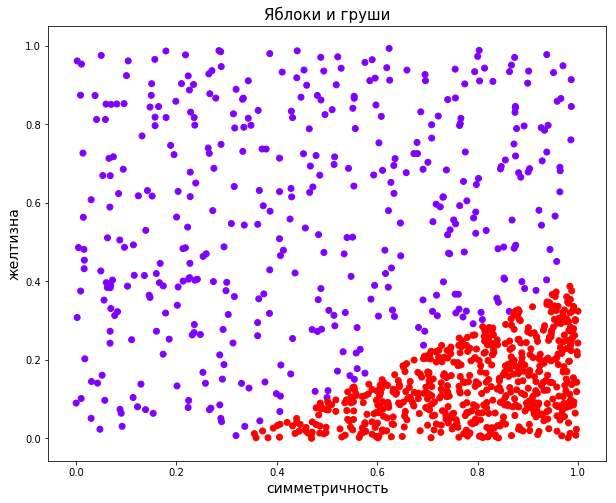

In [12]:
plt.figure(figsize=(10, 8))
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=data['target'], cmap='rainbow')
plt.title('Яблоки и груши', fontsize=15)
plt.xlabel('симметричность', fontsize=14)
plt.ylabel('желтизна', fontsize=14)
plt.show();

### Вопрос: Какой класс соответствует яблокам (какого они цвета на графике)?

Обозначим, что здесь признаки, а что - классы:

In [13]:
X = data.iloc[:,:2].values  # матрица объекты-признаки
# y = data['target'].values.reshape((-1, 1))  # классы (столбец из нулей и единиц)
y = data['target'].values  # классы (столбец из нулей и единиц)

** Вывод функции потерь (1.5 балла) **  
Функция потерь должна убывать и в итоге стать близкой к 0

100%|██████████| 10/10 [00:00<00:00, 40.62it/s]


[ 0.03001045 -0.0493158 ] -0.01


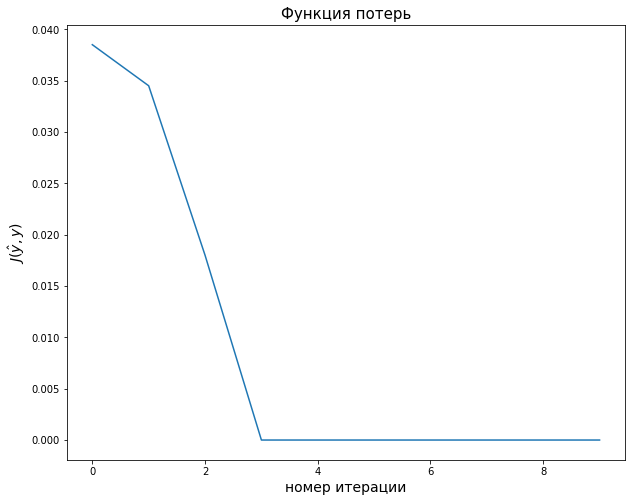

CPU times: user 632 ms, sys: 4 ms, total: 636 ms
Wall time: 641 ms


In [14]:
%%time
perceptron = Perceptron(np.array([0, 0]), 0)
J_values = perceptron.fit(X, y)

print(perceptron.w, perceptron.b)

plt.figure(figsize=(10, 8))
plt.plot(J_values)
plt.title('Функция потерь', fontsize=15)
plt.xlabel('номер итерации', fontsize=14)
plt.ylabel('$J(\hat{y}, y)$', fontsize=14)
plt.show()

Посмотрим, как перцептрон классифицировал объекты из выборки:

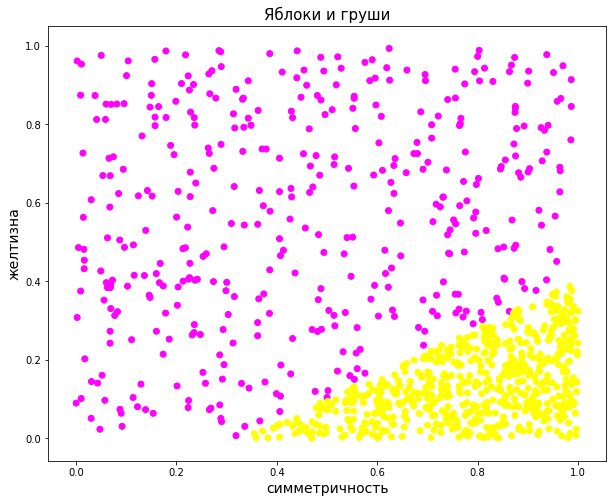

In [15]:
plt.figure(figsize=(10, 8))
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=perceptron.forward_pass(X), cmap='spring')
plt.title('Яблоки и груши', fontsize=15)
plt.xlabel('симметричность', fontsize=14)
plt.ylabel('желтизна', fontsize=14)
plt.show();

### Вопрос: Хорошее ли качество показывает перцептрон? Как Вы думаете, почему? Можете писать любые мысли на этот счёт.

#### Нейрон (сигмоидальный) 

В данном случае мы снова решаем задачу бинарной классификации (2 класса: 1 или 0), но здесь уже будет другая функция активации:
$$J(w, x) = \frac{1}{2n}\sum_{i=1}^{n} (\hat{y_i} - y_i)^2 = \frac{1}{2n}\sum_{i=1}^{n} (\sigma(w \cdot x_i) - y_i)^2$$  
Здесь $w \cdot x_i$ - скалярное произведение, а $\sigma(w \cdot x_i) =\frac{1}{1+e^{-w \cdot x_i}} $ - сигмоида.  

**Примечание:** Здесь предполагается, что $b$ - свободный член - является частью вектора весов и является $w_0$. Тогда, если к $X$ приписать единичный столбец, в скалярном произведении $b$ будет именно как свободный член.

Формула для обновления весов при градиентном спуске будут такие:

$$ \frac{\partial J}{\partial w} = \frac{1}{n}\sum_{i=1}^{n} (\sigma(w \cdot x_i) - y_i)\sigma(w \cdot x_i)(1 - \sigma(w \cdot x_i))x_i$$ (не забудьте, что $x_0$ = 1)

In [8]:
 from cmath import exp

In [9]:
def sigmoid(x):
    """Сигмоидальная функция"""    
    return 1/(1 + np.e ** (-x))

In [10]:
def sigmoid_prime(x):
    """Производная сигмоиды"""
    
    return sigmoid(x)*(1-sigmoid(x))

Теперь нужно написать нейрон с сигмоидной функцией активации. Здесь всё похоже на перцептрон, но будут по-другому обновляться веса и другая функция активации:

In [31]:
class Neuron (Perceptron):
    def activate(self, x):
        """
        Сигмоидальная активационная функция
        """
        
        return int(sigmoid(x))
    
    def backward_pass(self, X, y, y_pred, learning_rate=0.005):
        """
        Обновляет значения весов перцептрона в соответствии с этим объектом
        :param: X -- матрица входов размера (n, m)
                y -- вектор правильных ответов размера (n, 1)
                learning_rate - "скорость обучения" (символ alpha в формулах выше)
        """
        
        b_grad = np.sum((y_hat - y) * sigmoid_prime(y_hat))
        w_grad = b_grad * X
        
        self.w -= rate * w_grad
        self.b -= rate * b_grad


**Тестирование нейрона**

Здесь Вам нужно самим протестировать новый нейрон **на тех же данных** по аналогии с тем, как это было проделано с перцептроном.  (можете смело копировать код, только будьте осторожны - кое-что в нём всё же скорее всего придётся поправить).
В итоге нужно вывести: 
* график, на котором будет показано, как изменяется функция потерь $J$ в зависимости от числа итераций обучения (1.5 балла)
* график с раскраской выборки сигмоидальным нейроном (1.5 балла)

In [12]:

data = pd.read_csv("./data/apples_pears.csv")

X = np.vstack((data['yellowness'], data['symmetry'])).T
y = np.array(data['target'])

y_train = y[:800]
X_train = X[:800]

y_test = y[800:]
X_test = X[800:]

In [13]:
my_neuron = Neuron(np.array([0.01, 0.01]), 0.01)
j = my_neuron.fit(np.array(X_train), np.array(y_train), num_epochs=1000)

100%|██████████| 1000/1000 [00:16<00:00, 59.98it/s]


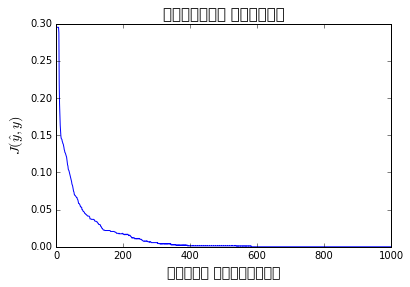

In [14]:
plt.plot(range(len(j)), j)
plt.title('Функция потерь', fontsize=15)
plt.xlabel('номер итерации', fontsize=14)
plt.ylabel('$J(\hat{y}, y)$', fontsize=14)
plt.show()

In [ ]:
plt.figure(figsize=(10, 8))
xt = np.linspace(0.33, 1, 100)
yt = (xt * -perceptron.w[0] - perceptron.b)/ perceptron.w[1]
plt.plot(xt, yt, "k--", label="Граница")
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=perceptron.forward_pass(X), cmap='winter', label="")
plt.title('Яблоки и груши', fontsize=15)
plt.xlabel('симметричность', fontsize=14)
plt.ylabel('желтизна', fontsize=14)
plt.legend()
plt.show()

### Вопрос: какие выводы можно сделать?